<a href="https://colab.research.google.com/github/AnaRian7/CODSOFT/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

### Data Collection and Preprocessing

In [ ]:
movie_data = pd.read_csv('/content/IMDb-Movies-India.csv', encoding = 'latin-1')

**Printing 1st 10 rows and last 10 rows**

In [ ]:
movie_data.head(10) #First 10 rows

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
movie_data.tail(10) #Last 10 rows

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,Zulm Ka Jawab,(1995),NaN,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,Zulm Ka Muqabla,(1993),NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,(1979),NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
movie_data.shape #Number of rows and columns

(15509, 10)

In [ ]:
print("Number of Rows", movie_data.shape[0])
print("Number of Columns", movie_data.shape[1])

Number of Rows 15509
Number of Columns 10


In [ ]:
movie_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


**Checking for null values**

In [ ]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

**Dropping columns**

In [ ]:
movie_data = movie_data.drop(columns = ['Name','Actor 2', 'Actor 3'])
movie_data.head(10)

,Year,Duration,Genre,Rating,Votes,Director,Actor 1
0,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
2,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
4,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
7,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave
9,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine


In [ ]:
movie_data.dropna(inplace = True)

In [ ]:
movie_data.drop_duplicates(inplace = True)
movie_data.shape

(5746, 7)

In [ ]:
movie_data.isnull().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

**Handling Columns**

In [ ]:
movie_data['Year'].unique()

array(['(2019)', '(1997)', '(2005)', '(2012)', '(2014)', '(2004)',
       '(2016)', '(1991)', '(2018)', '(2010)', '(1958)', '(2021)',
       '(2017)', '(2009)', '(1993)', '(2002)', '(2008)', '(1994)',
       '(2007)', '(2003)', '(1998)', '(1979)', '(1974)', '(2015)',
       '(2006)', '(1981)', '(2020)', '(1985)', '(2013)', '(2011)',
       '(1988)', '(1987)', '(1996)', '(1999)', '(1973)', '(1968)',
       '(1982)', '(1977)', '(1950)', '(1969)', '(1948)', '(1990)',
       '(1989)', '(2001)', '(2000)', '(1953)', '(1978)', '(1963)',
       '(1992)', '(1976)', '(1984)', '(1986)', '(1966)', '(1975)',
       '(1980)', '(1967)', '(1970)', '(1952)', '(1972)', '(1971)',
       '(1964)', '(1954)', '(1962)', '(1957)', '(1965)', '(1995)',
       '(1956)', '(1955)', '(1936)', '(1983)', '(1951)', '(1961)',
       '(1959)', '(1949)', '(1960)', '(1946)', '(1940)', '(1945)',
       '(1938)', '(1941)', '(1942)', '(1935)', '(1937)', '(1947)',
       '(1931)', '(1933)', '(1943)', '(1944)', '(1932)', '(193

In [ ]:
def handleYear(value):
    value = str(value).strip('()')
    return int(value)
movie_data['Year'] = movie_data['Year'].apply(handleYear)
movie_data['Year'].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [ ]:
movie_data['Duration'].unique()

array(['109 min', '110 min', '147 min', '142 min', '82 min', '116 min',
       '96 min', '120 min', '161 min', '166 min', '102 min', '87 min',
       '132 min', '105 min', '146 min', '168 min', '158 min', '126 min',
       '94 min', '138 min', '124 min', '144 min', '157 min', '136 min',
       '107 min', '113 min', '80 min', '122 min', '149 min', '148 min',
       '130 min', '121 min', '188 min', '115 min', '103 min', '114 min',
       '170 min', '100 min', '99 min', '140 min', '128 min', '93 min',
       '125 min', '145 min', '75 min', '111 min', '134 min', '104 min',
       '92 min', '137 min', '127 min', '119 min', '135 min', '90 min',
       '150 min', '151 min', '95 min', '52 min', '89 min', '112 min',
       '143 min', '177 min', '117 min', '123 min', '72 min', '154 min',
       '175 min', '153 min', '78 min', '139 min', '133 min', '180 min',
       '46 min', '164 min', '162 min', '171 min', '160 min', '152 min',
       '163 min', '165 min', '141 min', '129 min', '156 min', '240 

In [ ]:
def handleDuration(value):
    value=str(value).split(' ')
    value=value[0]
    return int(value)
movie_data['Duration']=movie_data['Duration'].apply(handleDuration)
movie_data['Duration'].head()

1    109
3    110
5    147
6    142
8     82
Name: Duration, dtype: int64

In [ ]:
movie_data['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Horror, Mystery, Romance',
       'Horror, Mystery', 'Drama, Horror, Romance',
       'Action, Drama, History', 'Action, Drama, War', 'Thriller',
       'Comedy', 'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Drama, History', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Adventure, Drama', 'Comedy, Mystery, Thriller', 'Drama, Romance',
       'Crime, Thriller', 'Horror, Sci-Fi, Thriller',
       'Drama, Mystery, Thriller', 'Drama, Family, Musical',
       'Action, Comedy', 'Action, Adventure, Fantasy', 'Documentary',
       'Drama, Horro

In [ ]:
def split_genre_column(movie_data,Genre):

    movie_data['Genre1'] = movie_data[Genre].str.split(',', expand=True)[0]
    movie_data['Genre2'] = movie_data[Genre].str.split(',', expand=True)[1]
    movie_data['Genre3'] = movie_data[Genre].str.split(',', expand=True)[2]
    return movie_data

split_genre_column(movie_data,'Genre')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Drama,None,None
15494,2001,153,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Biography,Drama,History
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Action,Crime,Drama
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Action,Drama,None


In [ ]:
movie_data.isnull().sum()

Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Genre1         0
Genre2      1717
Genre3      3412
dtype: int64

In [ ]:
movie_data = movie_data.fillna(0)
movie_data.isnull().sum()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Genre1      0
Genre2      0
Genre3      0
dtype: int64

In [ ]:
G=['Genre1','Genre2','Genre3']
for x in G:
    movie_data[x],_ = pd.factorize(movie_data[x])

movie_data = movie_data.drop(columns=['Genre'])
movie_data.head(3)

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0
3,2019,110,4.4,35,Ovais Khan,Prateik,1,1,0
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1


In [ ]:
movie_data['Votes'].unique()

array(['8', '35', '827', ..., '70,344', '408', '1,496'], dtype=object)

In [ ]:
def handleVotes(value):
    value = str(value).replace(',','')
    return int(value)
movie_data['Votes'] = movie_data['Votes'].apply(handleVotes)
movie_data['Votes'].head()

1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64

### Feature Selection

**Age of the movie**

In [ ]:
movie_data['MovieAge'] = 2024 - movie_data['Year']
movie_data['MovieAge']

1         5
3         5
5        27
6        19
8        12
         ..
15493     9
15494    23
15503    35
15505    25
15508    26
Name: MovieAge, Length: 5746, dtype: int64

**Popularity of the Director and the Actor**

In [ ]:
DirectorCounts =movie_data['Director'].value_counts()
movie_data['DirectorPopularity']= movie_data['Director'].map(DirectorCounts)
ActorCounts= movie_data['Actor 1'].value_counts()
movie_data['ActorPopularity']=movie_data['Actor 1'].map(ActorCounts)

**Log Transformation of Votes**

In [ ]:
movie_data['LogVotes']=np.log1p(movie_data['Votes'])
movie_data['LogVotes']

1        2.197225
3        3.583519
5        6.719013
6        6.991177
8        5.789960
           ...   
15493    6.013715
15494    7.311218
15503    3.806662
15505    6.486161
15508    3.044522
Name: LogVotes, Length: 5746, dtype: float64

**Historial Average Rating**

In [ ]:
DirectorAvgRating = movie_data.groupby('Director')['Rating'].mean()
movie_data['DirectorAvgRating'] = movie_data['Director'].map(DirectorAvgRating)

ActorAvgRating = movie_data[['Actor 1']].stack().reset_index(name='Actor')
ActorAvgRating = ActorAvgRating.merge(movie_data[['Rating']], left_on='level_0', right_index=True)
ActorAvgRating = ActorAvgRating.groupby('Actor')['Rating'].mean()
movie_data['ActorAvgRating'] = movie_data['Actor 1'].map(ActorAvgRating)

### Data Visualization

**Director's Influence on a Movie's Ratings**

<ipython-input-82-567534f4144d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movie_data[movie_data['Director'].isin(TopDirectors)], x='Director', y='Rating', palette='viridis')


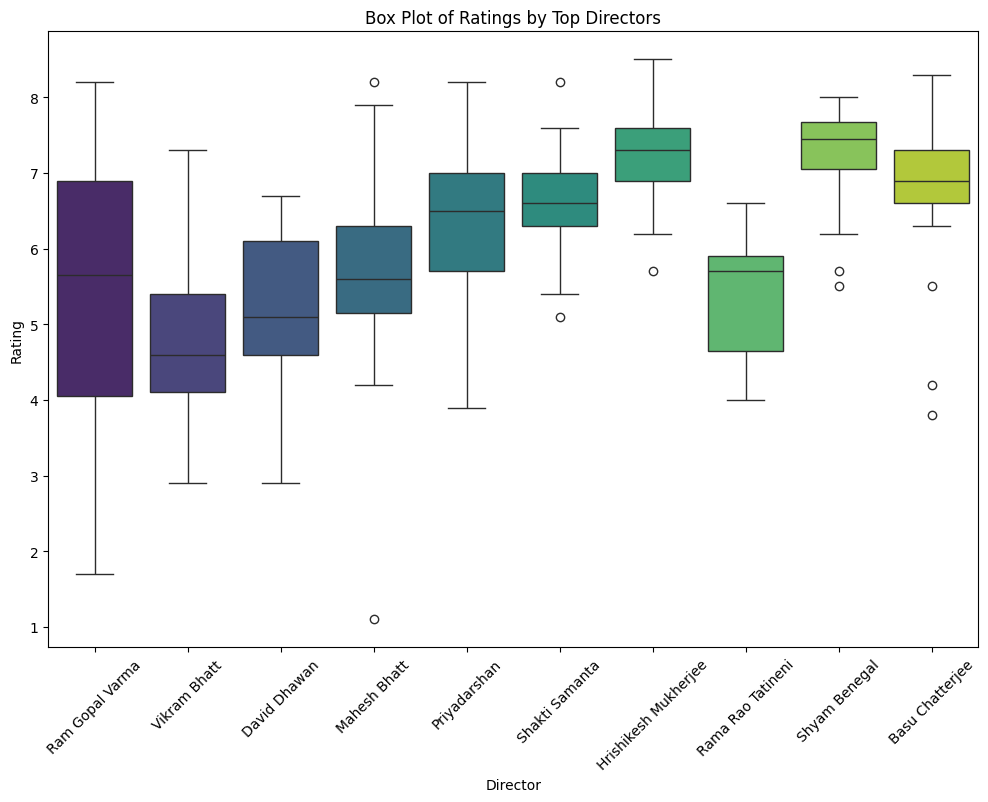

In [ ]:
plt.figure(figsize=(12, 8))
TopDirectors=movie_data['Director'].value_counts().index[0:10]
sns.boxplot(data=movie_data[movie_data['Director'].isin(TopDirectors)], x='Director', y='Rating', palette='viridis')

plt.title('Box Plot of Ratings by Top Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

**Actor Influence on a Movie's Ratings**

<ipython-input-83-44b3079e5986>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movie_data[movie_data['Actor 1'].isin(TopActors)], x='Actor 1', y='Rating', palette='magma')


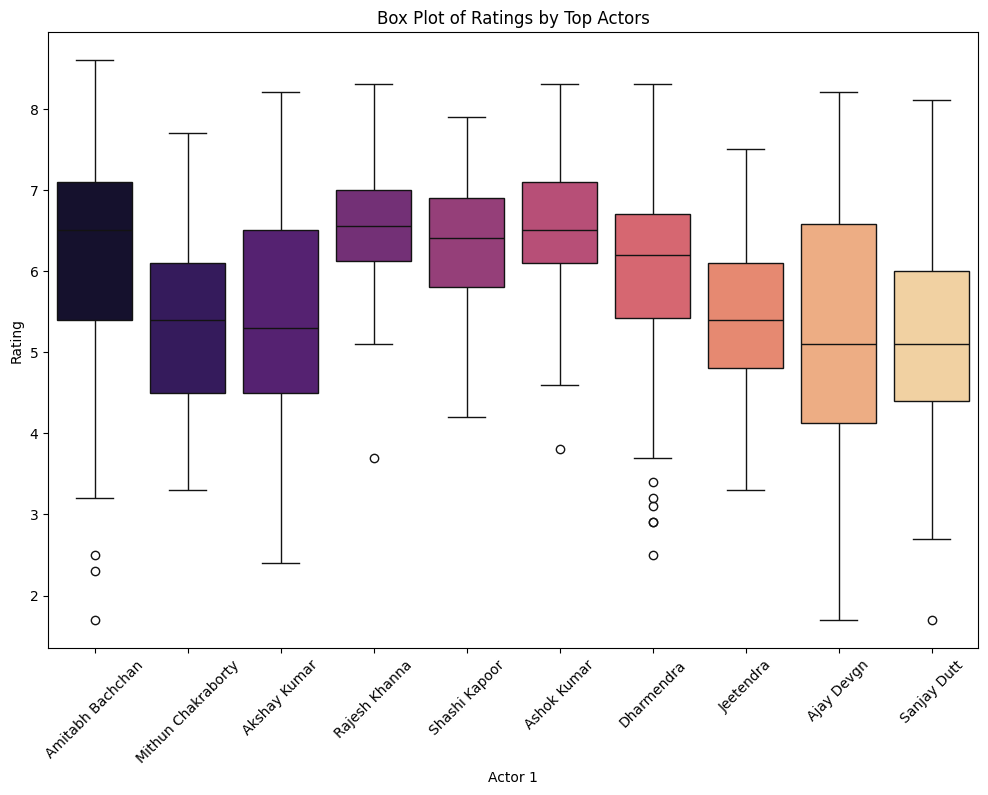

In [ ]:
plt.figure(figsize=(12, 8))
TopActors = movie_data['Actor 1'].value_counts().index[:10]
sns.boxplot(data=movie_data[movie_data['Actor 1'].isin(TopActors)], x='Actor 1', y='Rating', palette='magma')

plt.title('Box Plot of Ratings by Top Actors')
plt.xlabel('Actor 1')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

Genre Vs Rating pairplot

<Figure size 1500x1200 with 0 Axes>

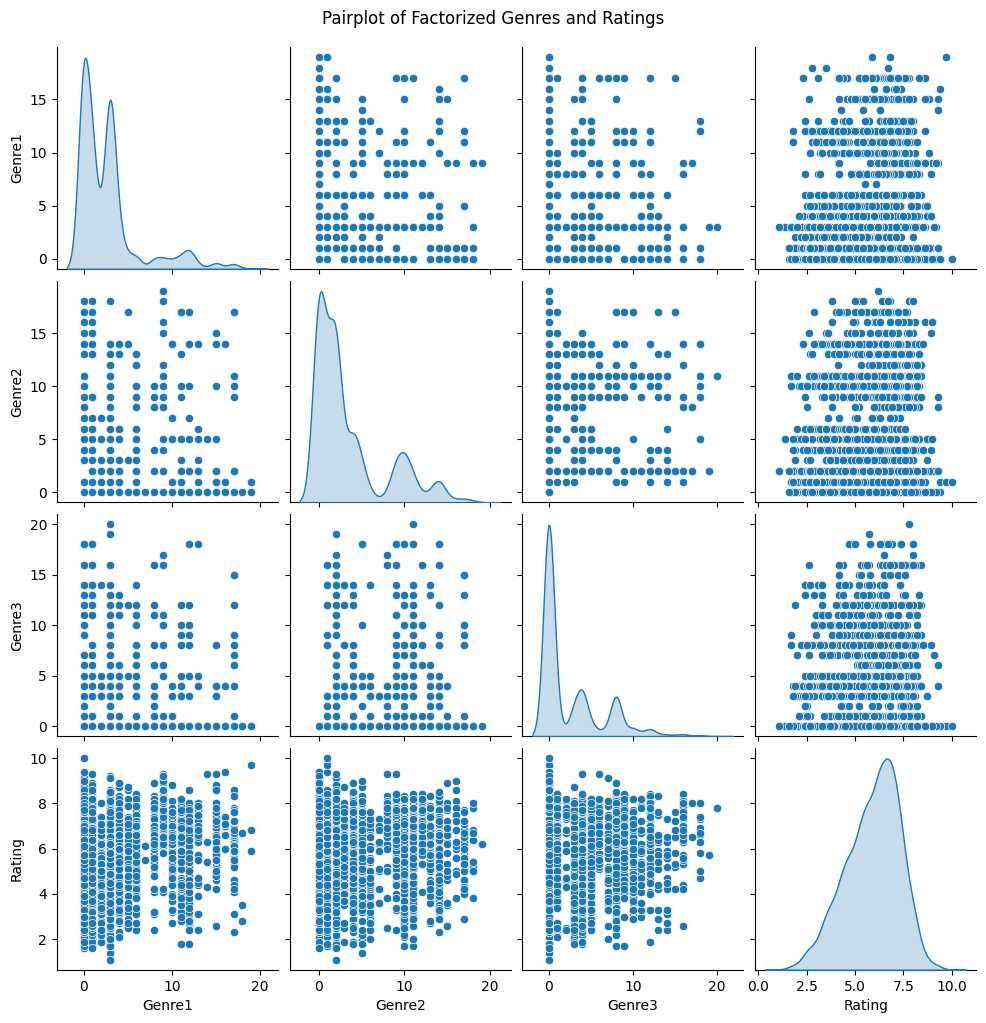

In [ ]:
GenreColumns=['Genre1','Genre2','Genre3','Rating']
plt.figure(figsize=(15,12))
sns.pairplot(movie_data[GenreColumns],diag_kind='kde',kind='scatter')

plt.suptitle('Pairplot of Factorized Genres and Ratings', y=1.02)
plt.show()

**Box Plot of Ratings by Year**

<ipython-input-75-536b955ed9c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=movie_data,x='Year',y='Rating',palette='Spectral')


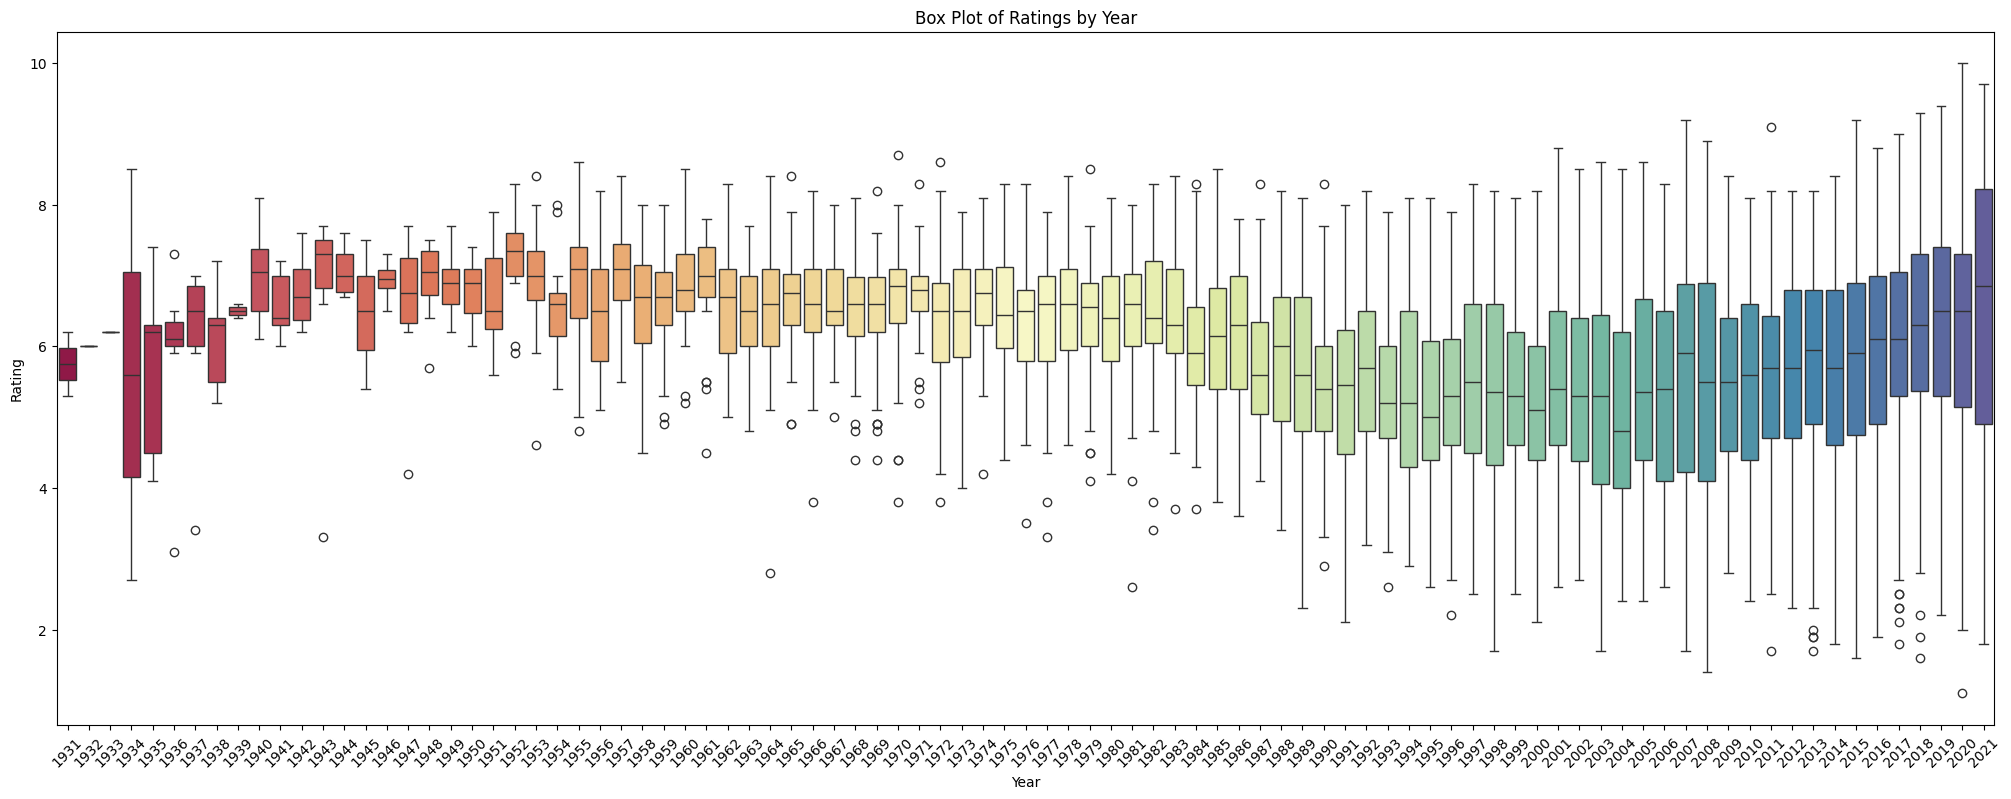

In [ ]:
plt.figure(figsize=(25,9))
sns.boxplot(data=movie_data,x='Year',y='Rating',palette='Spectral')
sns.dark_palette("#69d",reverse=True,as_cmap=True)
plt.title('Box Plot of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

### Model Training

In [ ]:
movie_data['Genre1 encoded'] =round(movie_data.groupby('Genre1')['Rating'].transform('mean'),1)
movie_data['Genre2 encoded']=round(movie_data.groupby('Genre2')['Rating'].transform('mean'),1)
movie_data['Genre3 encoded'] =round(movie_data.groupby('Genre3')['Rating'].transform('mean'),1)
movie_data['Votes encoded'] =round(movie_data.groupby('Votes')['Rating'].transform('mean'), 1)
movie_data['Director encoded']= round(movie_data.groupby('Director')['Rating'].transform('mean'), 1)
movie_data['Actor 1 encoded']= round(movie_data.groupby('Actor 1')['Rating'].transform('mean'), 1)
movie_data.head()

,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3,MovieAge,...,ActorPopularity,LogVotes,DirectorAvgRating,ActorAvgRating,Genre1 encoded,Genre2 encoded,Genre3 encoded,Votes encoded,Director encoded,Actor 1 encoded
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0,5,...,2,2.197225,7.000000,6.850000,6.3,6.0,6.0,5.6,7.0,6.8
3,2019,110,4.4,35,Ovais Khan,Prateik,1,1,0,5,...,5,3.583519,4.400000,5.420000,5.8,5.9,6.0,5.7,4.4,5.4
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol,1,2,1,27,...,18,6.719013,5.313333,4.788889,5.8,5.9,6.0,4.8,5.3,4.8
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,0,1,2,19,...,20,6.991177,7.383333,5.435000,6.3,5.9,6.3,7.4,7.4,5.4
8,2012,82,5.6,326,Allyson Patel,Yash Dave,2,3,3,12,...,1,5.789960,5.600000,5.600000,4.7,5.7,5.7,6.6,5.6,5.6


In [ ]:
movie_data.drop(columns=['Genre1','Votes','Director','Actor 1','Genre2','Genre3'],inplace=True)
movie_data['Rating'] =round(movie_data['Rating'],1)

Train and Split Data

In [ ]:
X=movie_data.drop("Rating",axis=1)
Y=movie_data["Rating"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=52)

model=LinearRegression()
model.fit(X_train,Y_train)

X_test_prediction= model.predict(X_test)

mse =mean_squared_error(Y_test,X_test_prediction)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r2 = r2_score(Y_test,X_test_prediction)
print(f"R-squared score: {r2:.2f}")

Mean Squared Error (MSE): 0.40
R-squared score: 0.79


**Decision Trees**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_DT=DecisionTreeRegressor(random_state=42)
model_DT.fit(X_train,Y_train)
X_test_prediction_DT=model_DT.predict(X_test)

mse_DT =mean_squared_error(Y_test,X_test_prediction_DT)
print(f"Mean Squared Error (MSE): {mse_DT:.2f}")

r2_DT = r2_score(Y_test,X_test_prediction_DT)
print(f"R-squared score: {r2_DT:.2f}")

Mean Squared Error (MSE): 0.53
R-squared score: 0.71


**Random Forests**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_RF=RandomForestRegressor(n_estimators=100,random_state=50)
model_RF.fit(X_train,Y_train)
X_test_prediction_RF=model_RF.predict(X_test)

mse_RF =mean_squared_error(Y_test,X_test_prediction_RF)
print(f"Mean Squared Error (MSE): {mse_RF:.2f}")

r2_RF = r2_score(Y_test,X_test_prediction_RF)
print(f"R-squared score: {r2_RF:.2f}")

Mean Squared Error (MSE): 0.26
R-squared score: 0.86


**Gradient Boosting**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_GB = GradientBoostingRegressor(n_estimators=100,random_state=50)
model_GB.fit(X_train,Y_train)
X_test_prediction_GB=model_GB.predict(X_test)

mse_GB =mean_squared_error(Y_test,X_test_prediction_GB)
print(f"Mean Squared Error (MSE): {mse_GB:.2f}")

r2_GB= r2_score(Y_test,X_test_prediction_GB)
print(f"R-squared score: {r2_GB:.2f}")

Mean Squared Error (MSE): 0.25
R-squared score: 0.88


**SVM**

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

model_SVR = SVR(kernel='linear',C=1.0,epsilon=0.1,gamma='scale')
model_SVR.fit(X_train,Y_train)
X_test_prediction_SVR=model_SVR.predict(X_test)

mse_SVR =mean_squared_error(Y_test,X_test_prediction_SVR)
print(f"Mean Squared Error (MSE): {mse_SVR:.2f}")

r2_SVR= r2_score(Y_test,X_test_prediction_SVR)
print(f"R-squared score: {r2_SVR:.2f}")

Mean Squared Error (MSE): 0.49
R-squared score: 0.74


**Results of Models**

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting','Support Vector Machine'],
    'Mean Squared Error (MSE)': [mse*100,mse_DT*100,mse_RF*100,mse_GB*100,mse_SVR*100],
    'R-squared score (R2)': [r2*100, r2_DT*100,r2_RF*100,r2_GB*100,r2_SVR*100]
})
print(results)

                    Model  Mean Squared Error (MSE)  R-squared score (R2)
0       Linear Regression                 39.653133             79.415164
1           Decision Tree                 52.963478             70.818402
2           Random Forest                 25.918214             85.864395
3       Gradient Boosting                 24.874143             88.207694
4  Support Vector Machine                 48.859927             73.529988


**Comparing the Results**

In [ ]:
models = results['Model']
mse_scores = results['Mean Squared Error (MSE)'].round(2)
r2_scores = results['R-squared score (R2)'].round(2)
num_models = len(models)
bar_width = 0.35
index = np.arange(num_models)

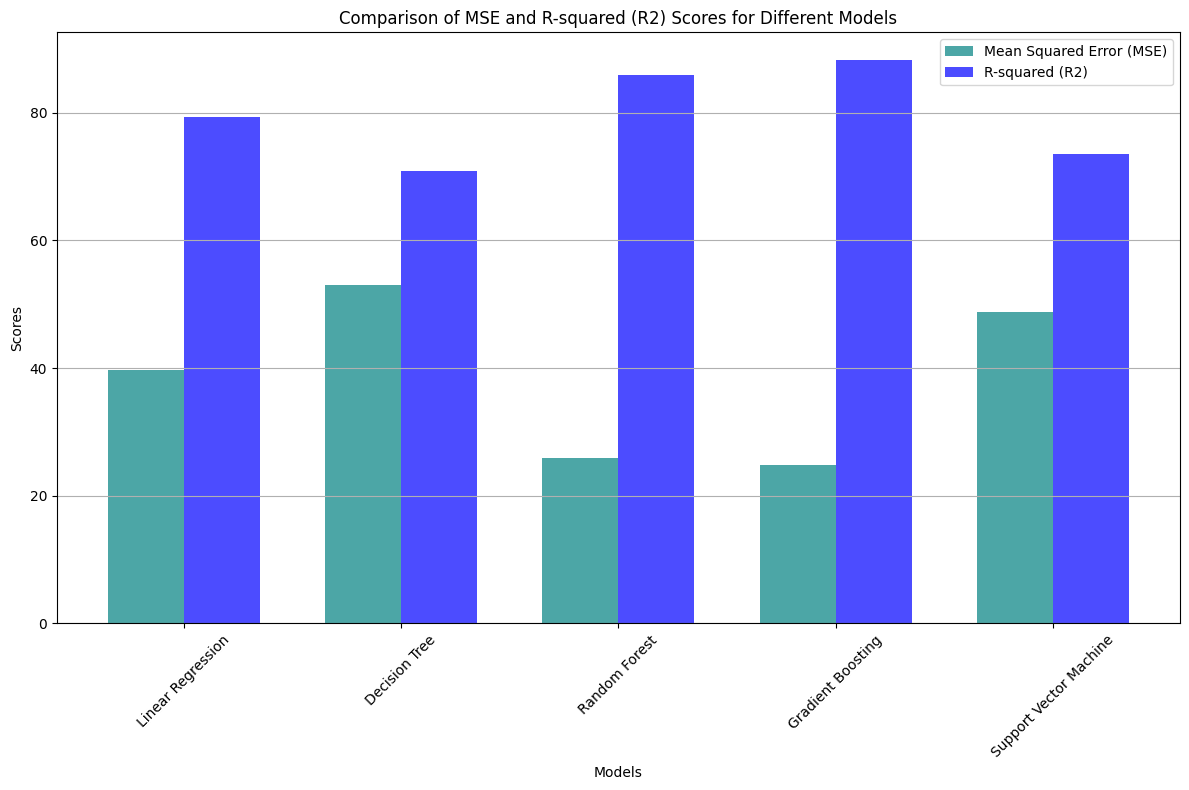

In [ ]:
plt.figure(figsize=(12, 8))

plt.bar(index,mse_scores,bar_width,label='Mean Squared Error (MSE)',color='teal',alpha=0.7)
plt.bar(index +bar_width,r2_scores, bar_width,label='R-squared (R2)',color='blue',alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of MSE and R-squared (R2) Scores for Different Models')
plt.xticks(index +bar_width/2,models,rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()